In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [78]:
# Load the dataset
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/HR-Employee-Attrition.csv')

In [79]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [80]:
df.shape

(1470, 35)

In [81]:
df.duplicated().sum()

0

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [83]:
X = df.drop(columns='Attrition')
y = df['Attrition']

In [84]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [85]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [86]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

y = label.fit_transform(y)

In [87]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [88]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

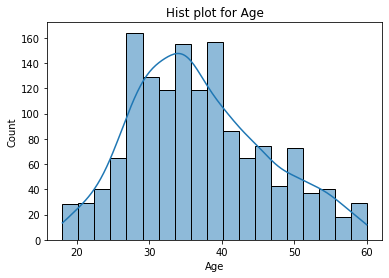

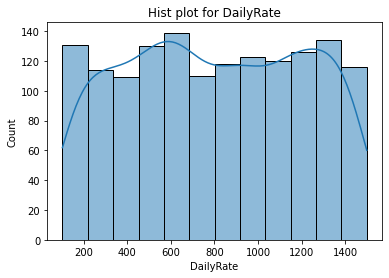

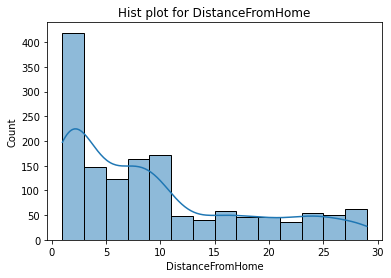

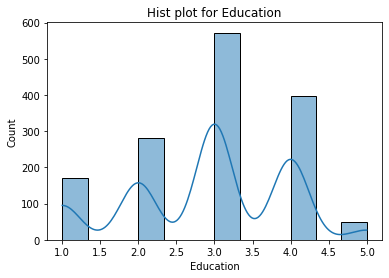

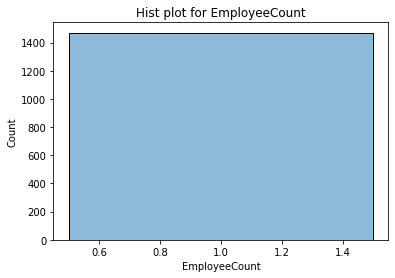

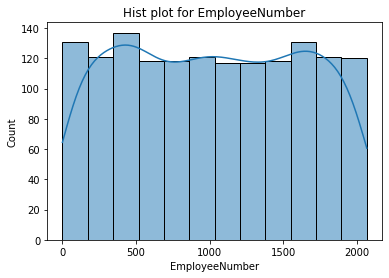

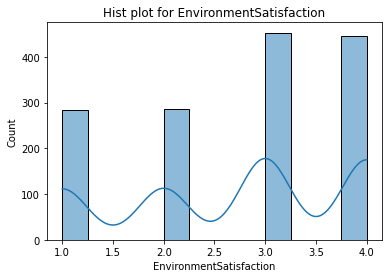

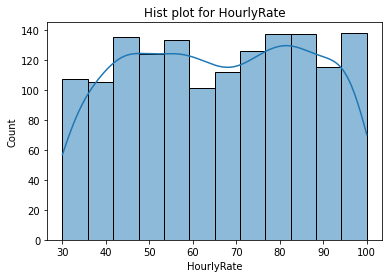

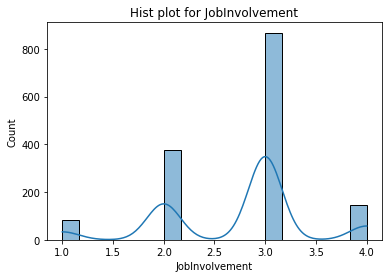

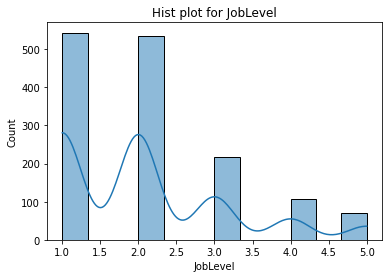

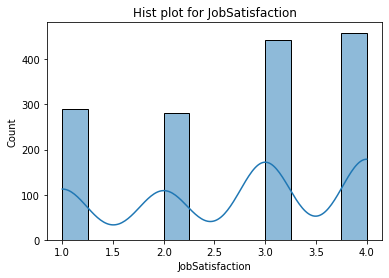

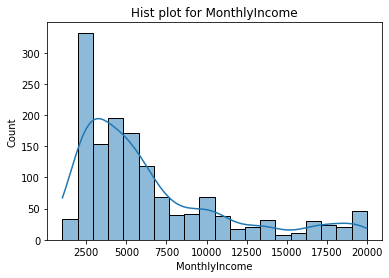

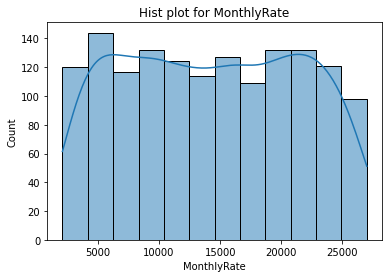

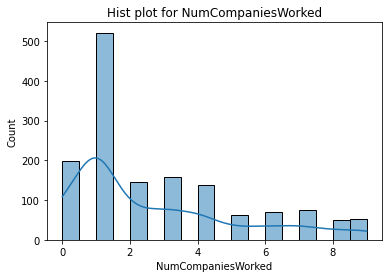

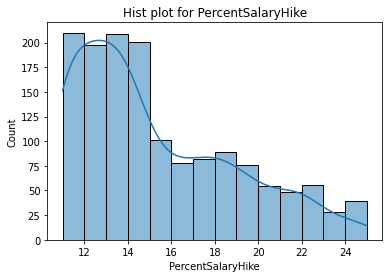

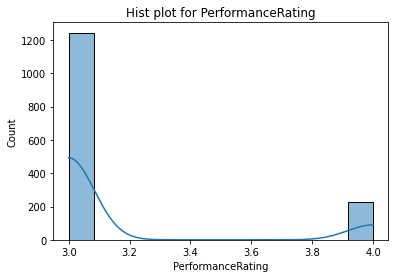

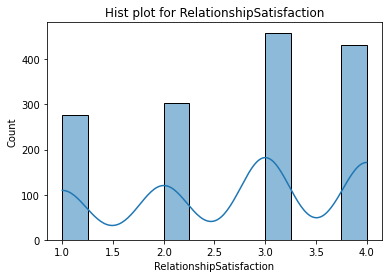

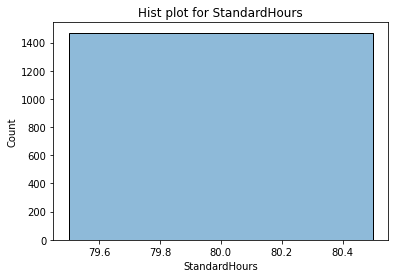

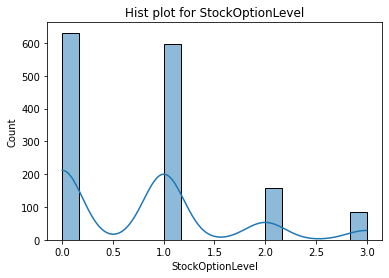

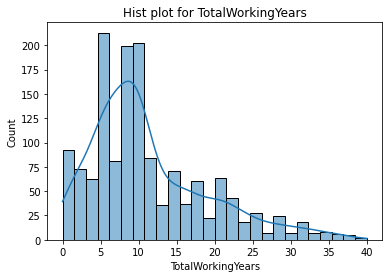

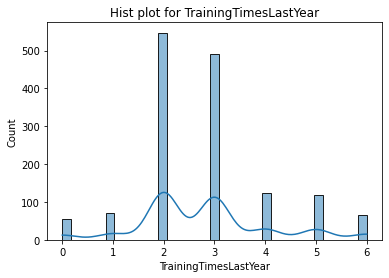

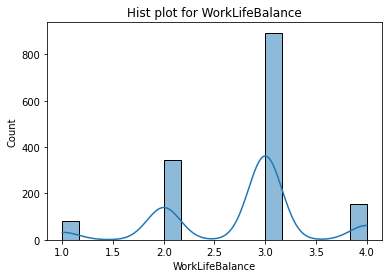

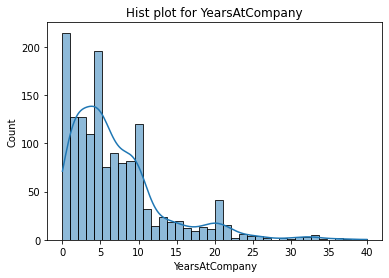

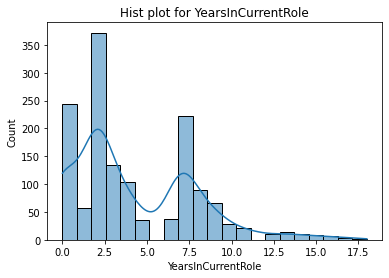

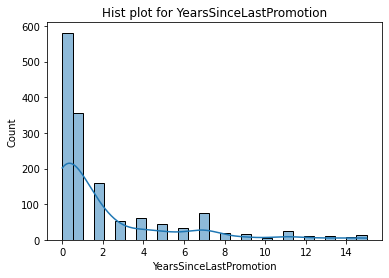

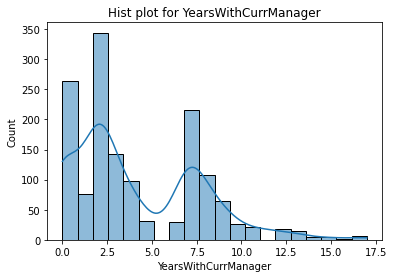

--------------------------------------------------


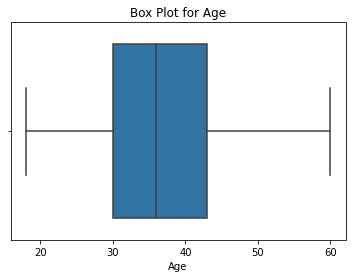

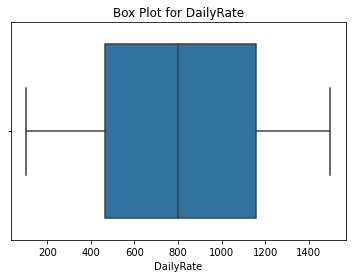

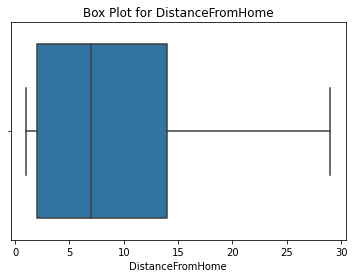

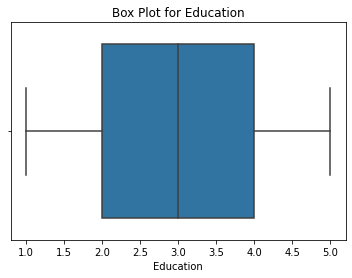

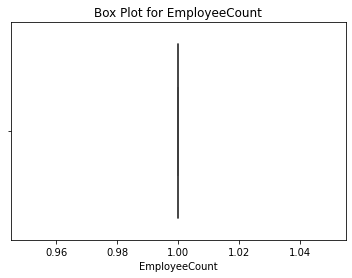

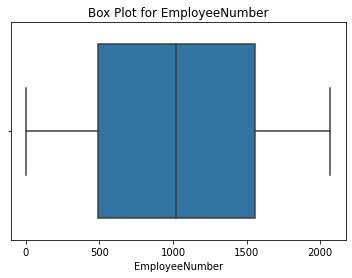

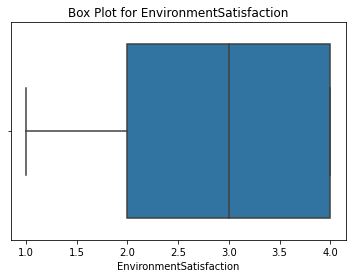

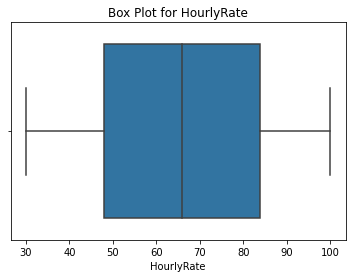

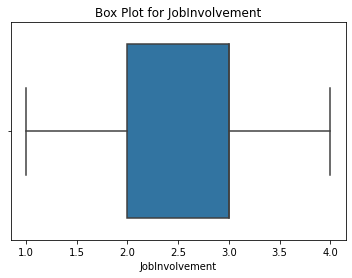

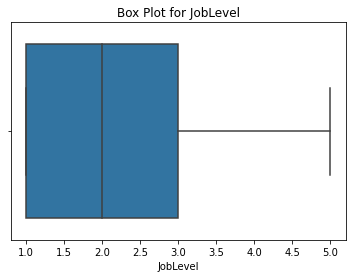

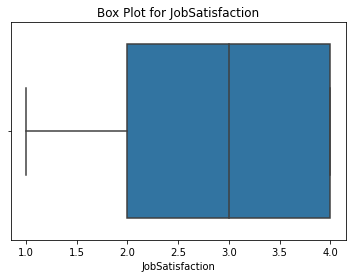

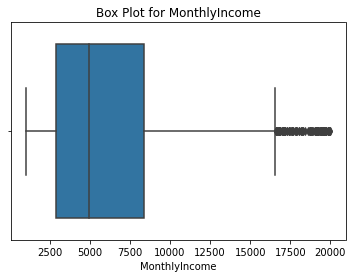

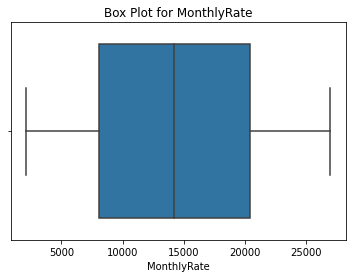

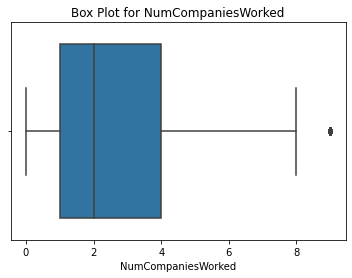

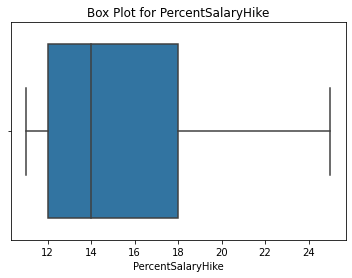

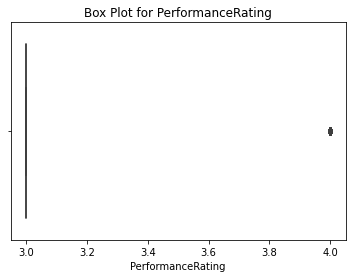

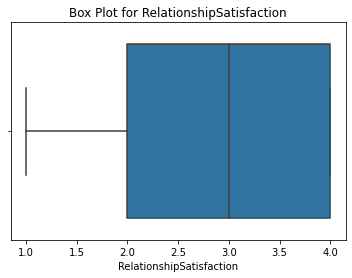

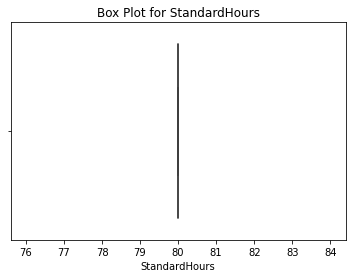

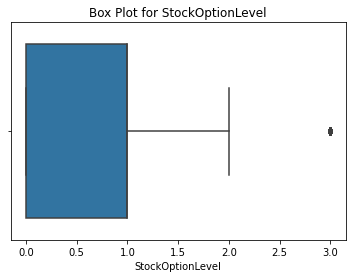

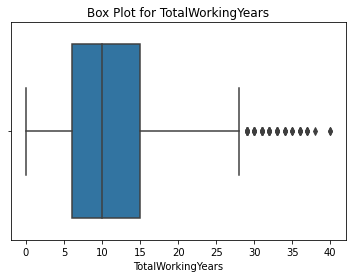

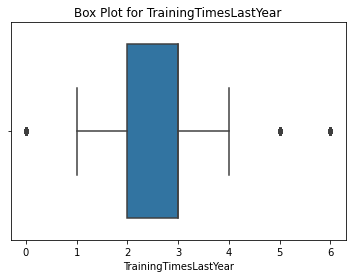

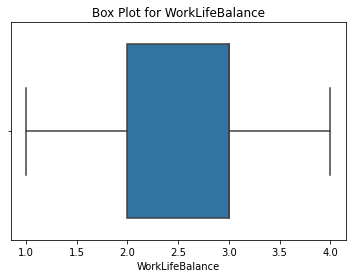

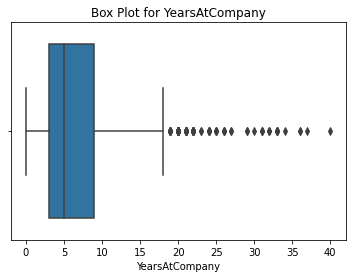

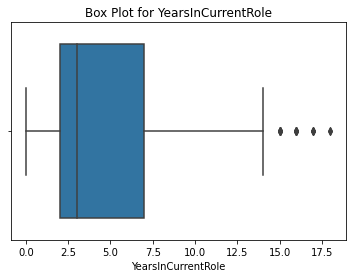

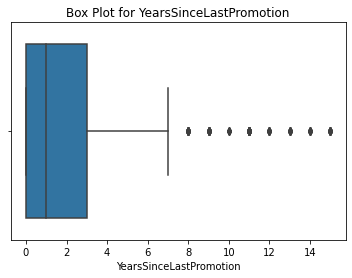

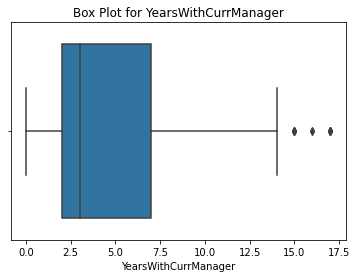

--------------------------------------------------


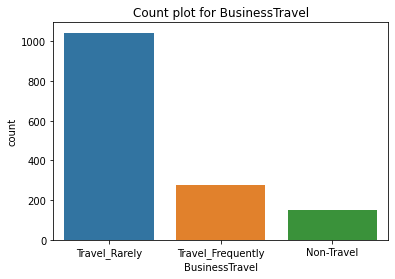

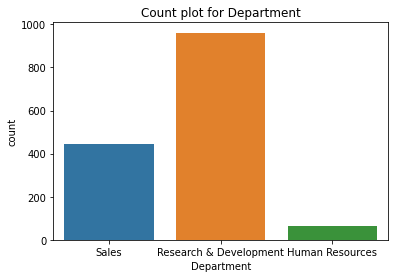

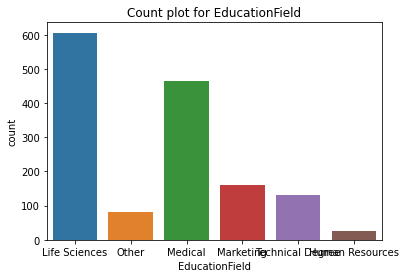

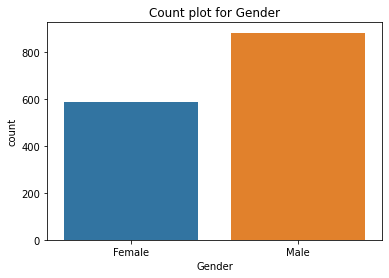

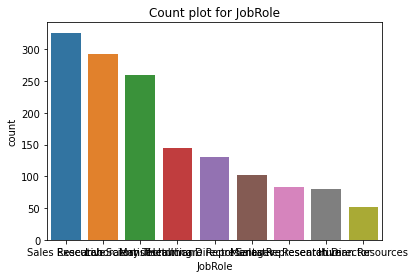

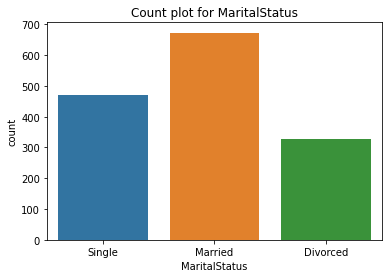

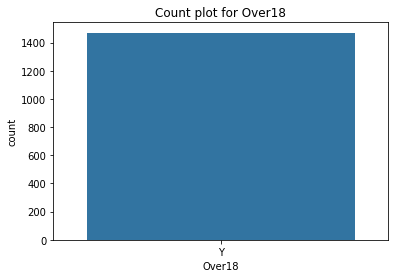

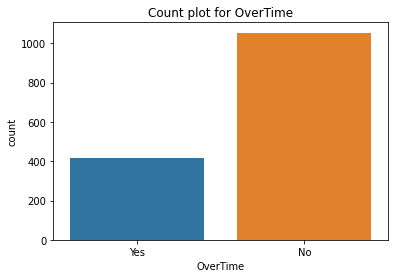

--------------------------------------------------


<AxesSubplot:ylabel='count'>

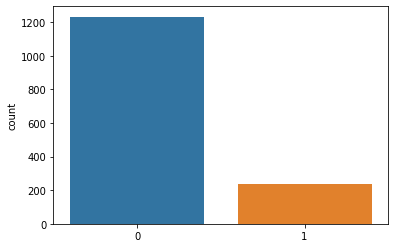

In [89]:
import seaborn as sns

for col in num_cols:
    sns.histplot(data=X,x=col,kde=True)
    plt.title(f"Hist plot for {col}")
    plt.show()

print('-'*50)

for col in num_cols:
    sns.boxplot(data=X,x=col)
    plt.title(f"Box Plot for {col}")
    plt.show()

print('-'*50)

for col in cat_cols:
    sns.countplot(data=X,x=col)
    plt.title(f"Count plot for {col}")
    plt.show()

print('-'*50)

sns.countplot(data=X,x=y)

## Feature Selection

In [90]:
from scipy.stats import ttest_ind,chi2_contingency

significant_num_values = {}
for col in num_cols:
    group0 = X.loc[y==0,col]
    group1 = X.loc[y==1,col]
    ttest,p_value = ttest_ind(group0,group1)

    if p_value < 0.05:
        significant_num_values[col] = {
            'ttest':ttest,
            'p_value': p_value
        }

    print(f"{col}:{ttest:.3f},p_value:{p_value:.3f}")

print(significant_num_values.keys())


Age:6.179,p_value:0.000
DailyRate:2.174,p_value:0.030
DistanceFromHome:-2.995,p_value:0.003
Education:1.203,p_value:0.229
EmployeeCount:nan,p_value:nan
EmployeeNumber:0.405,p_value:0.685
EnvironmentSatisfaction:3.982,p_value:0.000
HourlyRate:0.262,p_value:0.793
JobInvolvement:5.024,p_value:0.000
JobLevel:6.574,p_value:0.000
JobSatisfaction:3.986,p_value:0.000
MonthlyIncome:6.204,p_value:0.000
MonthlyRate:-0.581,p_value:0.561
NumCompaniesWorked:-1.668,p_value:0.096
PercentSalaryHike:0.516,p_value:0.606
PerformanceRating:-0.111,p_value:0.912
RelationshipSatisfaction:1.759,p_value:0.079
StandardHours:nan,p_value:nan
StockOptionLevel:5.305,p_value:0.000
TotalWorkingYears:6.652,p_value:0.000
TrainingTimesLastYear:2.283,p_value:0.023
WorkLifeBalance:2.455,p_value:0.014
YearsAtCompany:5.196,p_value:0.000
YearsInCurrentRole:6.232,p_value:0.000
YearsSinceLastPromotion:1.266,p_value:0.206
YearsWithCurrManager:6.059,p_value:0.000
dict_keys(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSati

In [91]:
significant_cat_cols = {}

for col in cat_cols:
    contengency = pd.crosstab(X[col],y)
    chi2,p_value,dof,expected = chi2_contingency(contengency)

    if p_value < 0.05:
        significant_cat_cols[col] = {
            'chi2': chi2,
            'p_value': p_value
        }

    print(f"{col}:{chi2:.3f},p_value:{p_value:.3f}")

print(significant_cat_cols.keys())


BusinessTravel:24.182,p_value:0.000
Department:10.796,p_value:0.005
EducationField:16.025,p_value:0.007
Gender:1.117,p_value:0.291
JobRole:86.190,p_value:0.000
MaritalStatus:46.164,p_value:0.000
Over18:0.000,p_value:1.000
OverTime:87.564,p_value:0.000
dict_keys(['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'])


In [92]:
updated_num = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
               'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

updated_col = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [93]:
X = X[updated_num+updated_col]

In [94]:
X.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,3,2,4,5993,0,8,...,1,6,4,5,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Yes
1,49,279,8,3,2,2,2,5130,1,10,...,3,10,7,7,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,No
2,37,1373,2,4,2,1,3,2090,0,7,...,3,0,0,0,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Yes
3,33,1392,3,4,3,1,3,2909,0,8,...,3,8,7,0,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,27,591,2,1,3,1,2,3468,1,6,...,3,2,2,2,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,No


In [95]:
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('num_pipe',RobustScaler()),
    ('impute',SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('cat_cols',OneHotEncoder(drop='first',sparse=False)),
    ('impute',SimpleImputer(strategy='most_frequent'))
])

preproces_cols = ColumnTransformer([
    ('num_preprocess',num_pipeline,updated_num),
    ('cat_prprocess',cat_pipeline,updated_col)
])

In [96]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
X_train_preprocessed = preproces_cols.fit_transform(X_test)
X_test_preprocessed = preproces_cols.fit_transform(X_test)

In [98]:
X_train_preprocessed

array([[-0.61538462,  0.05557587, -0.17021277, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.30769231,  0.37440585,  0.5106383 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.92307692, -0.85996344,  1.27659574, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.07692308,  0.72248629,  1.78723404, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.07692308,  0.58062157,  0.25531915, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.84615385, -0.84680073, -0.42553191, ...,  1.        ,
         0.        ,  1.        ]])

In [99]:
X_test_preprocessed

array([[-0.61538462,  0.05557587, -0.17021277, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.30769231,  0.37440585,  0.5106383 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.92307692, -0.85996344,  1.27659574, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.07692308,  0.72248629,  1.78723404, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.07692308,  0.58062157,  0.25531915, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.84615385, -0.84680073, -0.42553191, ...,  1.        ,
         0.        ,  1.        ]])

In [100]:
X_train_preprocessed.shape

(294, 35)

In [101]:
input_shape = X_train_preprocessed.shape[1]

In [102]:
input_shape

35

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64,activation='relu',kernel_regularizer=l2(0.001),input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32,activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])


In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                2304      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [107]:
history = model.fit(
    X_train_preprocessed,y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 0.7719 - accuracy: 0.5362 - val_loss: 0.6294 - val_accuracy: 0.8814
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.8170 - val_loss: 0.5254 - val_accuracy: 0.8983
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.8468 - val_loss: 0.4764 - val_accuracy: 0.8983
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.8468 - val_loss: 0.4548 - val_accuracy: 0.8983
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.8468 - val_loss: 0.4446 - val_accuracy: 0.8983
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.8468 - val_loss: 0.4384 - val_accuracy: 0.8983
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.8468 - val_loss: 0.4362 - val_accuracy: 0.8983
Epoch 8/100
8/8 [=========

In [108]:
y_pred_proba = model.predict(X_test_preprocessed)
y_pred = (y_pred_proba > 0.5).astype(int)

In [109]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy  = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
clf_report = classification_report(y_test,y_pred,zero_division=1)

In [110]:
print(accuracy)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"classification report:\n{clf_report}")

0.8673469387755102
Confusion Matrix:
[[255   0]
 [ 39   0]]
classification report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.93      0.50      0.46       294
weighted avg       0.88      0.87      0.81       294



In [111]:
import joblib
model.save('attirition.h5')
joblib.dump(preproces_cols,'pipeline.pkl')

['pipeline.pkl']

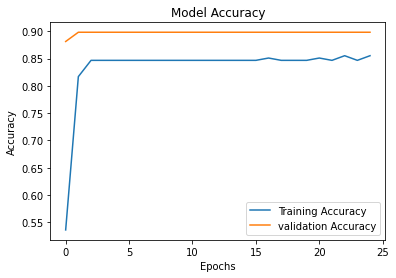

In [112]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

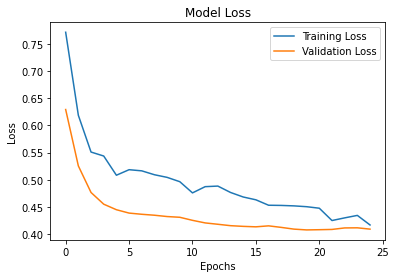

In [113]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()